<a href="https://colab.research.google.com/github/Vayansh/Machine_learning_training/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def eculidean_distance(x1,x2):
  return np.sqrt(np.sum((x1-x2)**2))

In [ ]:
class Kmeans:
  def __init__(self,clusters = 5,max_steps = 500,plot_steps = False):
    self.k = clusters
    self.n_iter = max_steps
    self.clusters = [[] for i in range(self.k)]
    self.centriods = None
    self.plot_s = plot_steps

  def predict(self,X):
    self.X = X
    self.n_samples, self.n_features = X.shape

    random_idx = np.random.choice(self.n_samples,self.k,replace = False)
    self.centroids = X[random_idx]

    for _ in range(self.n_iter):
      self.clusters = self._create_cluster(self.centroids)

      if self.plot_s:
        self.plot()

      centroid_old = self.centroids
      self.centroids = self._get_centroids(self.clusters)

      if self._is_converged(centroid_old,self.centroids):
        break
      self.plot()
    return self._get_cluster_label(self.clusters)

  def _get_cluster_label(self,clusters):
    labels = np.empty(self.n_samples)

    for id,cl in enumerate(clusters):
      for samples in cl:
        labels[samples] = id
    return labels

  def _get_centroids(self,clusters):
    centroids = np.empty((self.k,self.n_features))
    centroids = [np.mean(self.X[i],axis = 0) for i in clusters]
    return centroids


  def _create_cluster(self, centroids):
    clusters = [[] for _ in range(self.k)]

    for idx, x in enumerate(self.X):
      closest_centroid = self._closest_centroid(x,centroids)
      clusters[closest_centroid].append(idx)
    return clusters


  def _closest_centroid(self,x,centroids):
    distances = [eculidean_distance(x,centr) for centr in centroids]
    return np.argmin(distances)

  def _is_converged(self,centroid_old,centroid_new):
    distance = [eculidean_distance(c_o, c_n) for c_o,c_n in zip(centroid_old,centroid_new)]
    return sum(distance) == 0

  def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()

In [ ]:
np.random.seed(42)
from sklearn.datasets import make_blobs

X, y = make_blobs(
        centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40
)
print(X.shape)


(500, 2)


3


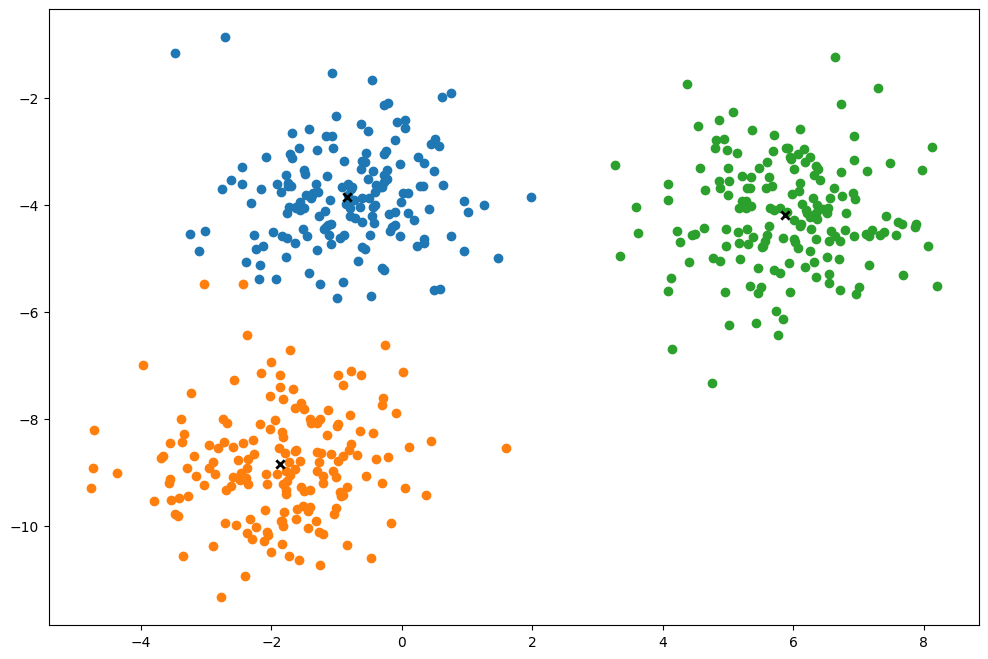

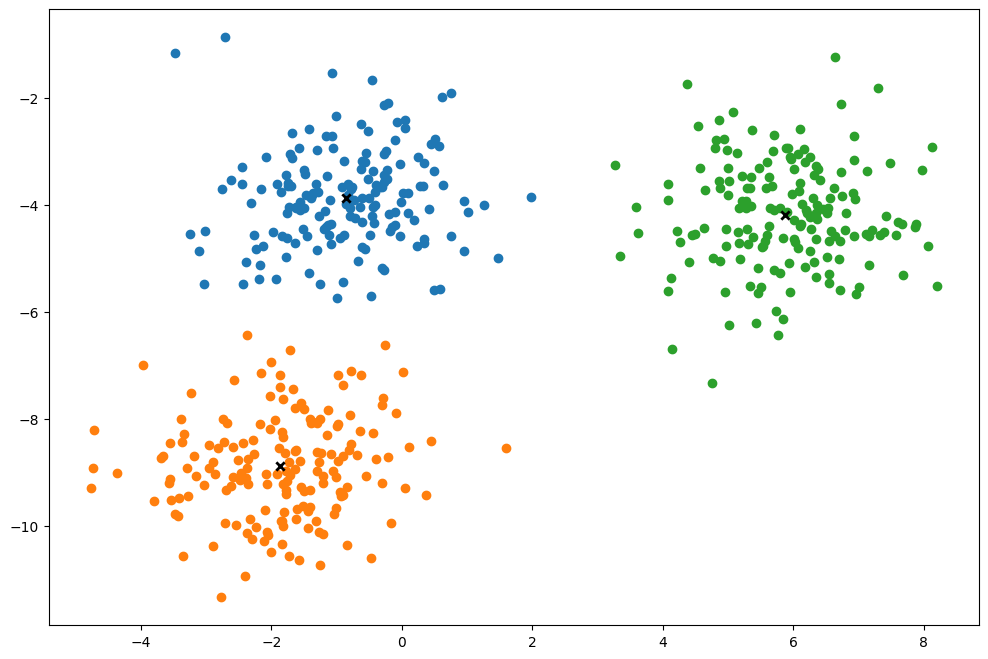

In [ ]:
clusters = len(np.unique(y))
print(clusters)

k = Kmeans(clusters, 150)
y_pred = k.predict(X)
